# Plot the segmentation masks for paper

In [3]:
import roif_config
from roif_config import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from matplotlib import rc
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import seaborn as sns

import xrf_roif_internals

from xrf_roif_internals import *

import xrfm_batches
from xrfm_batches import *

import fuzzy_kmeans_engine
from fuzzy_kmeans_engine import _format_soft_km_axes, soft_clustering_weights

%matplotlib inline

from skimage.filters import sobel,scharr,prewitt

In [5]:
BASE_PATCH_WIDTH=32
selected_elm_maps=['Cu','Zn','Ca', 'K', 'P', 'S','Fe','Ni','Total_Fluorescence_Yield']
noise_type='none'
base_file_path = '../xrfdata/'



coarse_scan_names = ['scan1.mda.h5', 
                    'scan2.mda.h5',
                    'scan3.mda.h5',
                    'scan4.mda.h5',
                    'scan5.mda.h5',
                    'scan6.mda.h5',
                    'scan7.mda.h5',
                    'scan8.mda.h5']




hdf5_string_list=['MAPS','MAPS','MAPS','MAPS','MAPS','MAPS','MAPS','MAPS']
norm_ch_list=['US_IC','US_IC','US_IC','US_IC','US_IC','US_IC','US_IC','US_IC']
selected_elm_maps_list=[selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps]
noise_type_list = [noise_type,noise_type,noise_type,noise_type,noise_type,noise_type,noise_type,noise_type]
bin_conv_elm_list=['KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa']
apply_gausssian_list=[False, False, False, False,False,False,False,False]
value_offset_list = [1e-12,1e-12,1e-12,1e-12,1e-12,1e-12,1e-12,1e-12]

BASE_PATCH_WIDTH=32



coarse_scans = XRFM_batch(base_file_path,
                  coarse_scan_names,
                 hdf5_string_list,
                 norm_ch_list,
                 selected_elm_maps_list,
                 noise_type_list,
                 bin_conv_elm_list,
                 value_offset_list,
                apply_gausssian_list,
                 BASE_PATCH_WIDTH,
                 print_pv=False,  
                 verbosity=False)

print('Bounding box width and height (pixels):' , BASE_PATCH_WIDTH)
print('Total extracted cells, features:', coarse_scans.X.shape)
print('Total extracted cell, cell size:', coarse_scans.X_bin.shape)



XRF ../xrfdata/scan1.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(41, 14)
XRF ../xrfdata/scan2.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(36, 14)
XRF ../xrfdata/scan3.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(17, 14)
XRF ../xrfdata/scan4.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(19, 14)
XRF ../xrfdata/scan5.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(11, 14)
XRF ../xrfdata/scan6.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(18, 14)
XRF ../xrfdata/scan7.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(16, 14)
XRF ../xrfdata/scan8.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(17, 14)
Bounding box width and height (pixels): 32
Total extracted cells, features: (175, 14)
Total extracted cell, cell

/data02/AZC/ROI-Finder/flx_workflows/xrf_roif_internals.py:106: RuntimeWarning: divide by zero encountered in true_divide
  #             self.scan_time_stamp=dat['MAPS/scan_time_stamp']
/data02/AZC/ROI-Finder/flx_workflows/xrf_roif_internals.py:106: RuntimeWarning: invalid value encountered in true_divide
  #             self.scan_time_stamp=dat['MAPS/scan_time_stamp']


In [6]:
len(coarse_scans.X_bin)

175

In [7]:
coarse_scans.X_bin[0].shape

(32, 32)

In [8]:
# sobel_mag = np.sqrt(sum([sobel(img_seg_mask, axis=i)**2
#                          for i in range(img_seg_mask.ndim)]) / img_seg_mask.ndim)
# plt.figure(dpi=200)
# plt.imshow(sobel_mag)
# # plt.imshow(img_seg_mask, cmap = 'copper', alpha = 0.3)
# plt.colorbar(orientation='horizontal', shrink=0.5)
# plt.title(coarse_scan_names[idx])
# plt.gca().invert_yaxis() 

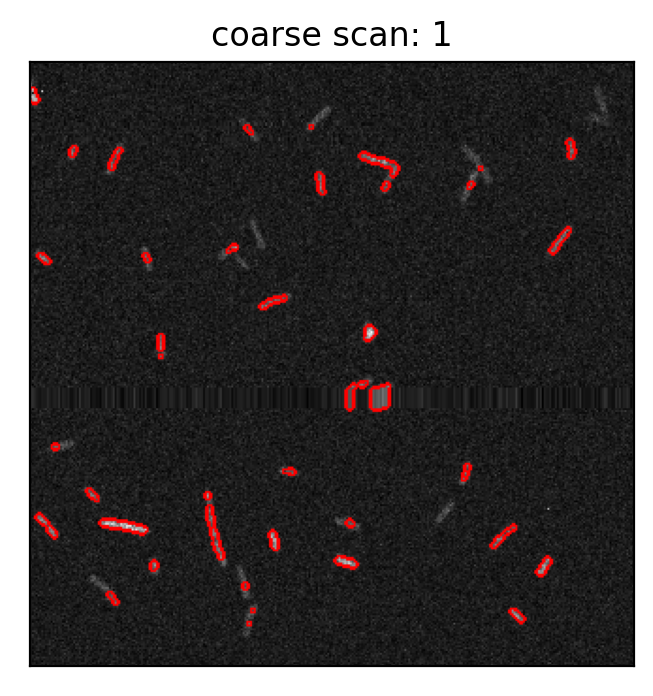

In [9]:
idx = 0
img=coarse_scans.X_d_K[idx]+coarse_scans.X_d_P[idx]+coarse_scans.X_d_S[idx]+coarse_scans.X_d_Ca[idx]
# img=coarse_scans.X_d_P[idx]


img_seg_mask = coarse_scans.X_binary_ero_dil[idx]
img_normalized = (255*((img - img.min()) / (img.max() - img.min()))).astype(np.uint8)
img_RGB = np.concatenate([img_normalized[...,np.newaxis]]*3, axis = -1)


sobel_mag = np.sqrt(sum([sobel(img_seg_mask, axis=i)**2
                         for i in range(img_seg_mask.ndim)]) / img_seg_mask.ndim)
img_sobel = sobel_mag
img_sobel = (img_sobel - img_sobel.min()) / (img_sobel.max() - img_sobel.min())
img_sobel = (255*np.round(img_sobel)).astype(np.uint8)

img_RGB[img_sobel == 255] = [255,0,0]

plt.figure(dpi=200)
plt.imshow(img_sobel,cmap='Blues_r',alpha = 1.0)



# plt.imshow(exposure.adjust_gamma(img_RGB, 0.85))

plt.imshow(img_RGB)
# plt.colorbar(orientation='horizontal', shrink=0.5)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

# plt.title(coarse_scan_names[idx])
plt.title('coarse scan: ' + str(idx+1))
plt.gca().invert_yaxis()   


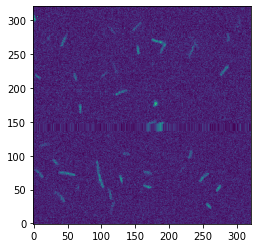

In [10]:
from skimage import data, exposure, img_as_float
image = img_as_float(coarse_scans.X_d_P[idx])
gamma_corrected = exposure.adjust_gamma(image, 200)
# Output is darker for gamma > 1
image.mean() > gamma_corrected.mean()
plt.imshow(image)
plt.gca().invert_yaxis()   

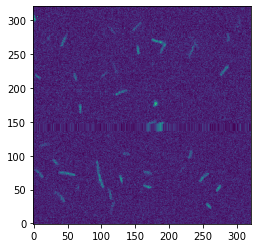

In [11]:
plt.imshow(coarse_scans.X_d_P[idx], alpha = 1.0)
plt.gca().invert_yaxis()   

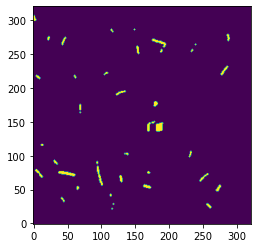

In [12]:
plt.imshow(img_seg_mask, alpha = 1.0)
plt.gca().invert_yaxis()   

In [13]:
sobel_mag

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

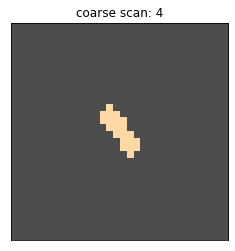

In [14]:
idx=3
plt.imshow(coarse_scans.X_bin[idx], cmap = 'copper', alpha = 0.7)
# plt.colorbar(orientation='horizontal', shrink=0.5)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

# plt.title(coarse_scan_names[idx])
plt.title('coarse scan: ' + str(idx+1))
plt.gca().invert_yaxis()   


In [15]:
# try different processing

base_file_path = '/data02/AZC/March_2022_XRF_Data/'


x= beamtime_XRF_image(xrf_filename = base_file_path + 'bnp_fly0032.mda.h5',
                     BASE_PATCH_WIDTH=BASE_PATCH_WIDTH, norm_ch='US_IC',value_offset=1e-12,apply_gaussian=False, print_pv=False, verbosity=False)
x.load_xrf_data(hdf5_string='MAPS')
x.load_element_maps(selected_elm_maps = selected_elm_maps)

# if self.normalize == True:
#     x.normalize_XRFM(channel = 'S')

# x.add_noise(noise=d)
# change noise_analysis back to false for regular use
x.binary_conversion(e='KPSCa', bin_conv_type = 'km')

x.extract_cells()
x.define_features(mode='max')



XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0032.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']


In [16]:
# # check extracted regions and if the count of pixels are good
# for idx in range(len(x.region_vals)):
#     print('idx = ', idx)
#     print(np.unique(x.binary_img[idx], return_counts=True)[1][1])

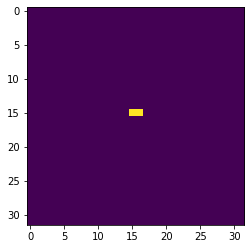

In [17]:
plt.imshow(x.binary_img[14])

In [18]:
# for km processing

In [19]:
# try different processing

base_file_path = '/data02/AZC/March_2022_XRF_Data/'
# for 104 np.vstack trouble


x= beamtime_XRF_image(xrf_filename = base_file_path + 'bnp_fly0042.mda.h5',
                     BASE_PATCH_WIDTH=BASE_PATCH_WIDTH, norm_ch='US_IC',value_offset=1e-12,apply_gaussian=False, print_pv=False, verbosity=False)
x.load_xrf_data(hdf5_string='MAPS')
x.load_element_maps(selected_elm_maps = selected_elm_maps)

# if self.normalize == True:
#     x.normalize_XRFM(channel = 'S')

# x.add_noise(noise=d)
# change noise_analysis back to false for regular use
x.binary_conversion(e='KPSCa', bin_conv_type = 'km')

x.extract_cells()
x.define_features(mode='max')



XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0042.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']


In [20]:
len(x.binary_img)

39

(321, 321)


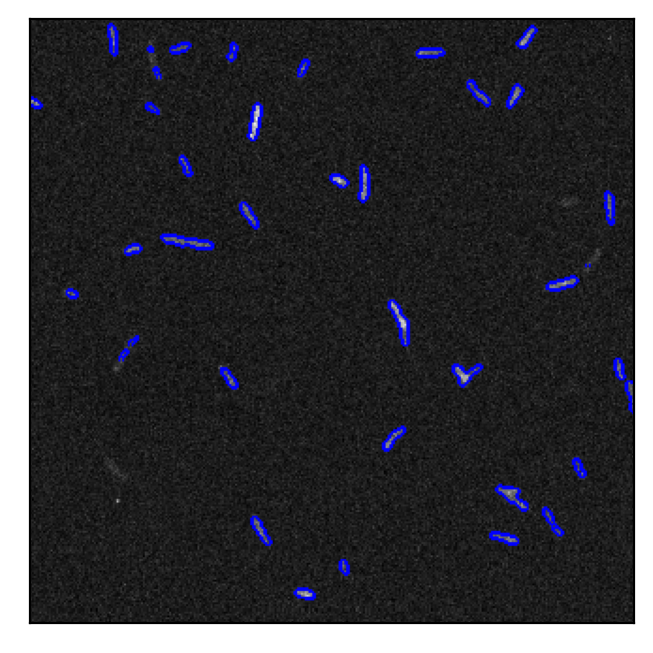

In [21]:
img=x.d_K+x.d_P+x.d_S+x.d_Ca

print(img.shape)
img_seg_mask = x.binary_ero_dil
img_normalized = (255*((img - img.min()) / (img.max() - img.min()))).astype(np.uint8)
img_RGB = np.concatenate([img_normalized[...,np.newaxis]]*3, axis = -1)


sobel_mag = np.sqrt(sum([sobel(img_seg_mask, axis=i)**2
                         for i in range(img_seg_mask.ndim)]) / img_seg_mask.ndim)
img_sobel = sobel_mag
img_sobel = (img_sobel - img_sobel.min()) / (img_sobel.max() - img_sobel.min())
img_sobel = (255*np.round(img_sobel)).astype(np.uint8)

img_RGB[img_sobel == 255] = [0,0,255]

plt.figure(dpi=200)
plt.imshow(img_sobel,cmap='Blues_r',alpha = 1.0)

plt.imshow(img_RGB)
# plt.colorbar(orientation='horizontal', shrink=0.5)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

# plt.title(coarse_scan_names[idx])
# plt.title('coarse scan: ', xrf_filename)
plt.gca().invert_yaxis()   
